<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/week3_%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import numpy as np

問題1 データセットの取得

In [27]:
import pandas as pd 
train= pd.read_csv('drive/My Drive/DIVE INTO CODE/0_課題/2_week3/授業前課題/data/train.csv',dtype = None)
print(train)

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]


問題2 データセット自体の調査

In [28]:
#記載予定

問題3 データの確認

In [29]:
#各特徴量の確認 
print(train.columns)

#目的変数の確認 目的変数とそれ以外に分類
train_x = train.drop('SalePrice',axis=1)
train_y = train["SalePrice"]
print(train_y)

#特徴量の平均値と標準偏差、四分位数を一度に表示させる
train.describe()



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


問題4 欠損値への対応

In [30]:
import missingno as msno

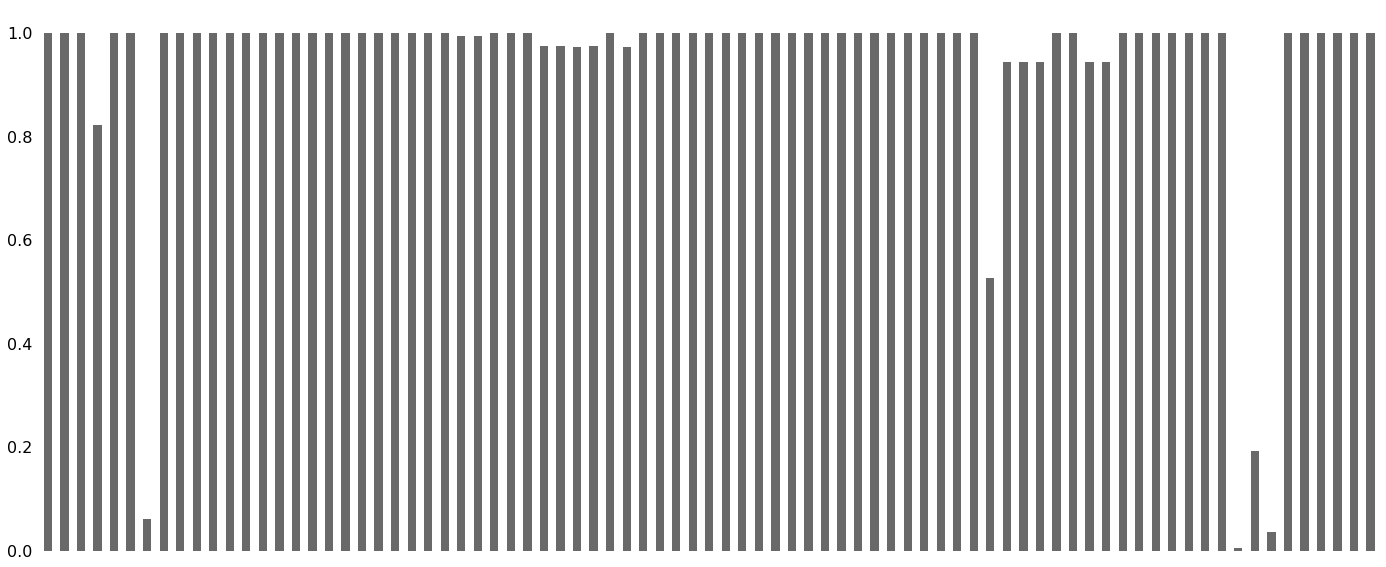

In [31]:
msno.bar(train);

In [9]:
def null_check(train):
    in_t=[]
    total=[]
    missing_ratio=[]
    for i in train.columns:
      in_t.append(i)
      total.append(train[i].isnull().sum())
      missing_ratio.append(train[i].isnull().sum()/len(train)*100)
    matrix=np.array([total,missing_ratio]).T
    col=['total','missing_ratio']
    df = pd.DataFrame(matrix,columns=col, index=in_t)
    df1=df[df.total>0]
    return df1
null_check(train)

,total,missing_ratio
LotFrontage,259.0,17.739726
Alley,1369.0,93.767123
MasVnrType,8.0,0.547945
MasVnrArea,8.0,0.547945
BsmtQual,37.0,2.534247
BsmtCond,37.0,2.534247
BsmtExposure,38.0,2.602740
BsmtFinType1,37.0,2.534247
BsmtFinType2,38.0,2.602740
Electrical,1.0,0.068493


In [10]:
#5つ以上欠損値がある特徴量（列）は削除
train2=train.dropna(thresh=1455, axis=1)
#欠損値があるサンプル（行）は削除する
train3=train2.dropna(how='any',axis=1)
print(train3.shape)

(1460, 62)


In [11]:
#欠損値が削除できているか確認
null_check(train3)

,total,missing_ratio


問題5 用語の調査

In [12]:
"""
尖度=分布の尖り度合いを示すもの。尖度が大きいほど尖った分布をしている
歪度=分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと
"""

'\n尖度=分布の尖り度合いを示すもの。尖度が大きいほど尖った分布をしている\n歪度=分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと\n'

問題6 分布の確認

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


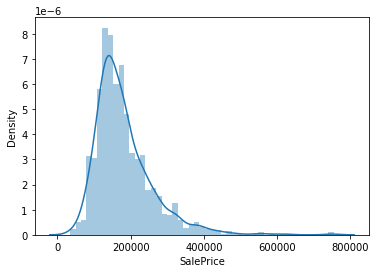

In [13]:
#seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する
import seaborn as ns
ns.distplot(train3['SalePrice'])


#尖度・歪度
var='SalePrice'
print("Skewness :", train3[var].skew()) #歪度
print("Kurtosis :", train3[var].kurt()) #尖度

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : 0.1212103673013655
Kurtosis : 0.8026555069117713


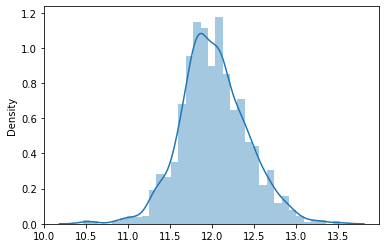

In [14]:
#対数変換
train_y=train3['SalePrice'].values

change=np.log(train_y)#対数変換

ns.distplot(change)

import scipy

skew = scipy.stats.skew(change)
# 尖度
kurtosis = scipy.stats.kurtosis(change)


print("Skewness :", skew) #歪度
print("Kurtosis :", kurtosis) #尖度

#対数変換後は正規分布に沿う形になり、歪度が減少している


問題7 相関係数の確認

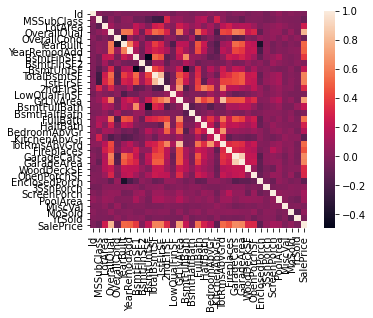

In [15]:
#相関係数行列
cor=train3.corr()
#print(cor)

#ヒートマップ
ns.heatmap(cor,
            square=True,
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)

                 corr_y
Id            -0.021917
MSSubClass    -0.084284
LotArea        0.263843
OverallQual    0.790982
OverallCond   -0.077856
YearBuilt      0.522897
YearRemodAdd   0.507101
BsmtFinSF1     0.386420
BsmtFinSF2    -0.011378
BsmtUnfSF      0.214479
TotalBsmtSF    0.613581
1stFlrSF       0.605852
2ndFlrSF       0.319334
LowQualFinSF  -0.025606
GrLivArea      0.708624
BsmtFullBath   0.227122
BsmtHalfBath  -0.016844
FullBath       0.560664
HalfBath       0.284108
BedroomAbvGr   0.168213
KitchenAbvGr  -0.135907
TotRmsAbvGrd   0.533723
Fireplaces     0.466929
GarageCars     0.640409
GarageArea     0.623431
WoodDeckSF     0.324413
OpenPorchSF    0.315856
EnclosedPorch -0.128578
3SsnPorch      0.044584
ScreenPorch    0.111447
PoolArea       0.092404
MiscVal       -0.021190
MoSold         0.046432
YrSold        -0.028923
SalePrice      1.000000
                corr_y
OverallQual   0.790982
YearBuilt     0.522897
YearRemodAdd  0.507101
TotalBsmtSF   0.613581
1stFlrSF      0.60585

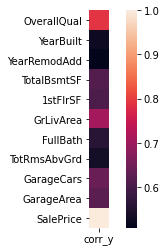

In [62]:
#yとの相関
corr_y = pd.DataFrame({"corr_y":cor['SalePrice']},index=None)  #corでは文字列の列は削除されている
#corr_y = corr_y.reset_index(drop=True)
#print(corr_y)

#±0.5以上の特徴量を抽出→10個
select_cols = corr_y[corr_y["corr_y"].abs()>0.5]
print(select_cols)

#相関が±0.5以上のヒートマップ
ns.heatmap(select_cols,
            square=True,
            xticklabels=select_cols.columns.values,
            yticklabels=select_cols.index.values)


In [51]:
#10個の特徴量が何を表しているかの記述
"""
OverallQual   家に備わる諸々の素材と仕上げの全体的な具合
YearBuilt     建築完了日
YearRemodAdd  リモデルの完了日
TotalBsmtSF   基本エリアの平方フィート
1stFlrSF      1Fの平方フィート
GrLivArea     地上の住居エリアの平方フィート
FullBath      バスルームのグレード
TotRmsAbvGrd  全部屋のグレード
GarageCars    ガレージのキャパシティ（車庫）
GarageArea    ガレージの平方フィート
"""

'\nOverallQual   家に備わる諸々の素材と仕上げの全体的な具合\nYearBuilt     建築完了日\nYearRemodAdd  リモデルの完了日\nTotalBsmtSF   基本エリアの平方フィート\n1stFlrSF      1Fの平方フィート\nGrLivArea     地上の住居エリアの平方フィート\nFullBath      バスルームのグレード\nTotRmsAbvGrd  全部屋のグレード\nGarageCars    ガレージのキャパシティ（車庫）\nGarageArea    ガレージの平方フィート\n'

              OverallQual  YearBuilt  ...  GarageCars  GarageArea
OverallQual      1.000000   0.572323  ...    0.600671    0.562022
YearBuilt        0.572323   1.000000  ...    0.537850    0.478954
YearRemodAdd     0.550684   0.592855  ...    0.420622    0.371600
TotalBsmtSF      0.537808   0.391452  ...    0.434585    0.486665
1stFlrSF         0.476224   0.281986  ...    0.439317    0.489782
GrLivArea        0.593007   0.199010  ...    0.467247    0.468997
FullBath         0.550600   0.468271  ...    0.469672    0.405656
TotRmsAbvGrd     0.427452   0.095589  ...    0.362289    0.337822
GarageCars       0.600671   0.537850  ...    1.000000    0.882475
GarageArea       0.562022   0.478954  ...    0.882475    1.000000

[10 rows x 10 columns]


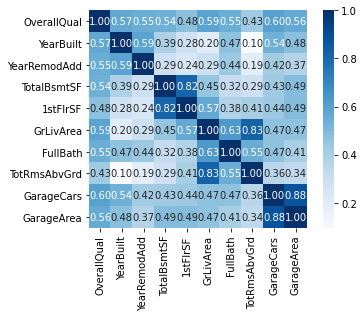

In [67]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す

new=pd.DataFrame({"OverallQual":cor['OverallQual'],"YearBuilt":cor['YearBuilt'],"YearRemodAdd":cor['YearRemodAdd'],"TotalBsmtSF":cor['TotalBsmtSF'],
                  "1stFlrSF":cor['1stFlrSF'],"GrLivArea":cor['GrLivArea'],"FullBath":cor['FullBath'],"TotRmsAbvGrd":cor['TotRmsAbvGrd']
                  ,"GarageCars":cor['GarageCars'],"GarageArea":cor['GarageArea']},
                 #以下は行
                 {"OverallQual":cor['OverallQual'],"YearBuilt":cor['YearBuilt'],"YearRemodAdd":cor['YearRemodAdd'],"TotalBsmtSF":cor['TotalBsmtSF'],
                  "1stFlrSF":cor['1stFlrSF'],"GrLivArea":cor['GrLivArea'],"FullBath":cor['FullBath'],"TotRmsAbvGrd":cor['TotRmsAbvGrd']
                  ,"GarageCars":cor['GarageCars'],"GarageArea":cor['GarageArea']})
print(new)


#ヒートマップ
ns.heatmap(new,annot=True,fmt='.2f',cmap='Blues',
            square=True,
            xticklabels=new.columns.values,
            yticklabels=new.index.values)

#相関の高い組み合わせを3つ抽出
"""
1位　GarageAreaとGarageCars：0.88
2位　TotRmsAbvGrdとGrLivArea:0.83
3位　TotalBsmtSFと1stFlrSF :0.82